In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from collections import defaultdict
from scipy.stats.stats import pearsonr

In [2]:
from sklearn.cluster import DBSCAN

In [3]:
df = pd.read_csv('training.csv')

In [4]:
df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [5]:
df['MMRAcquisitionAuctionAveragePrice'].fillna(df['MMRAcquisitionAuctionAveragePrice'].median(), inplace = True)
df['MMRAcquisitionAuctionCleanPrice'].fillna(df['MMRAcquisitionAuctionCleanPrice'].median(), inplace = True)
df['MMRAcquisitionRetailAveragePrice'].fillna(df['MMRAcquisitionRetailAveragePrice'].median(), inplace = True)
df['MMRAcquisitonRetailCleanPrice'].fillna(df['MMRAcquisitonRetailCleanPrice'].median(), inplace = True)
df['MMRCurrentAuctionAveragePrice'].fillna(df['MMRCurrentAuctionAveragePrice'].median(), inplace = True)
df['MMRCurrentAuctionCleanPrice'].fillna(df['MMRCurrentAuctionCleanPrice'].median(), inplace = True)
df['MMRCurrentRetailAveragePrice'].fillna(df['MMRCurrentRetailAveragePrice'].median(), inplace = True)
df['MMRCurrentRetailCleanPrice'].fillna(df['MMRCurrentRetailCleanPrice'].median(), inplace = True)

In [6]:
df['MMR_factor'] = ( df['MMRAcquisitionAuctionAveragePrice'] + df['MMRAcquisitonRetailCleanPrice'] + df['MMRCurrentAuctionCleanPrice'] + df['MMRCurrentRetailAveragePrice']) / 4

In [7]:
df_db = df[['VehOdo','MMR_factor','VehBCost','WarrantyCost','VehicleAge']]

In [8]:
X = StandardScaler().fit_transform(df_db.values)

In [9]:
dbscan = DBSCAN(eps = 0.97, min_samples = 10)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.97, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=None, p=None)

In [10]:
dbscan.labels_[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [11]:
np.unique(dbscan.labels_,return_counts = True)

(array([-1,  0], dtype=int64), array([  152, 58234], dtype=int64))

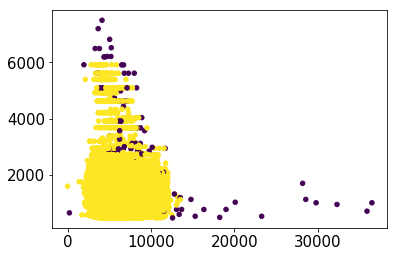

In [12]:
plt.scatter(df['VehBCost'], df['WarrantyCost'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [13]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_,sample_size = 5000))

Silhouette 0.530460781788348


In [14]:
from scipy.spatial.distance import pdist, squareform


In [15]:
Y = df_db.sample(n=10000)

In [19]:
df_db.describe()

,VehOdo,MMR_factor,VehBCost,WarrantyCost,VehicleAge
count,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000
mean,71478.090518,8036.347211,6730.008335,1276.105042,4.174956
std,14591.224550,2781.130339,1762.075265,598.885423,1.713833
min,4825.000000,0.000000,1.000000,462.000000,0.000000
25%,61785.000000,5994.500000,5430.000000,837.000000,3.000000
50%,73359.000000,8037.000000,6700.000000,1155.000000,4.000000
75%,82427.000000,9840.000000,7900.000000,1623.000000,5.000000
max,115717.000000,37992.250000,36485.000000,7498.000000,9.000000


In [20]:
Y.describe()

,VehOdo,MMR_factor,VehBCost,WarrantyCost,VehicleAge
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,71672.587100,8021.994875,6730.759640,1277.472000,4.197300
std,14722.527575,2774.921754,1763.046134,602.374903,1.727504
min,4825.000000,0.000000,225.000000,462.000000,1.000000
25%,61856.500000,5994.500000,5415.000000,853.000000,3.000000
50%,73598.500000,8032.000000,6700.000000,1169.000000,4.000000
75%,82738.000000,9825.312500,7915.000000,1623.000000,5.000000
max,110071.000000,30117.250000,28560.000000,7498.000000,9.000000


In [16]:
dist = pdist(Y, 'euclidean') 
print (dist)
dist = squareform(dist) 
print()
print(dist)

[ 2265.85530209 27659.52680814 35661.4860117  ... 24039.44587548
  9167.80208461 32783.80502722]

[[    0.          2265.85530209 27659.52680814 ... 11552.40240167
  35358.61011479  5717.77190543]
 [ 2265.85530209     0.         27176.11094325 ... 10904.87148021
  34912.12219273  4698.08126393]
 [27659.52680814 27176.11094325     0.         ... 16276.98184554
   7931.78088452 24937.36594074]
 ...
 [11552.40240167 10904.87148021 16276.98184554 ...     0.
  24039.44587548  9167.80208461]
 [35358.61011479 34912.12219273  7931.78088452 ... 24039.44587548
      0.         32783.80502722]
 [ 5717.77190543  4698.08126393 24937.36594074 ...  9167.80208461
  32783.80502722     0.        ]]


In [17]:
k = 20
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

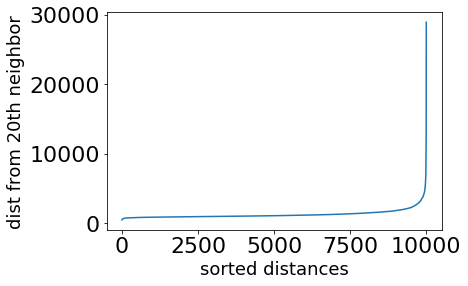

In [18]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()